# GIS Climate Data Analysis for Nepal

##  Objective  
This project focuses on **climate data analysis** for Nepal using **GIS Data Science** techniques.  
The goal is to perform **data reading, visualization, and exploratory data analysis (EDA)** to understand climate trends.

---

##  Dataset  
The dataset contains climate-related GIS data for Nepal, sourced from:  
🔗 [Nepal Climate Change Dataset](https://github.com/Desmondonam/Nepal_Climate_change)  

### **Dataset Columns:**  
- **DATE**: Timestamp of data recording  
- **YEAR**: Year of observation  
- **MONTH**: Month of observation  
- **DISTRICT**: District in Nepal  
- **LAT, LON**: Geographic coordinates  
- **PRECTOT**: Total precipitation (mm)  
- **T2M**: Average temperature (°C)  
- **T2M_MAX**: Maximum temperature (°C)  
- **T2M_MIN**: Minimum temperature (°C)  
- **RH2M**: Relative humidity (%)  
- **WS10M**: Wind speed at 10m height (m/s)  
- **...** (More climate-related variables)  

---

##  Setup Instructions  
### **Clone the Repository**  
```sh
git clone https://github.com/DhirajBro1.git
cd Nepal_Climate_Analysis


## Install dependencies
`pip install pandas geopandas seaborn matplotlib numpy`

#### importing libraries

In [22]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading The Data

In [23]:
# Load climate data
# Provide the correct local path to the downloaded .gpkg file
df = pd.read_csv("nepal_climate_data.csv")

# Display first few rows
print(df.head())

   _id                 DATE  YEAR  MONTH      DISTRICT   LAT   LON  PRECTOT  \
0    1  1981-01-31T00:00:00  1981      1  Arghakhanchi  27.9  83.2    67.31   
1    2  1981-02-28T00:00:00  1981      2  Arghakhanchi  27.9  83.2     3.37   
2    3  1981-03-31T00:00:00  1981      3  Arghakhanchi  27.9  83.2    26.02   
3    4  1981-04-30T00:00:00  1981      4  Arghakhanchi  27.9  83.2    46.15   
4    5  1981-05-31T00:00:00  1981      5  Arghakhanchi  27.9  83.2    69.45   

      PS  QV2M  ...  T2M_RANGE     TS  WS10M  WS10M_MAX  WS10M_MIN  \
0  93.78  5.28  ...      10.03  11.19   2.01       3.39       0.81   
1  93.52  5.13  ...      13.08  15.10   2.58       4.88       0.95   
2  93.40  5.91  ...      13.52  20.58   2.73       4.67       1.02   
3  93.03  6.52  ...      15.03  25.63   2.89       4.78       1.07   
4  92.75  9.95  ...      13.43  29.99   2.69       4.40       0.93   

   WS10M_RANGE  WS50M  WS50M_MAX  WS50M_MIN  WS50M_RANGE  
0         2.59   2.70       4.22       1.06  

#### Data Cleaning and preparaiton

In [37]:
df = df.dropna()  # Removing missing values
df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

#### temperature trend over time 

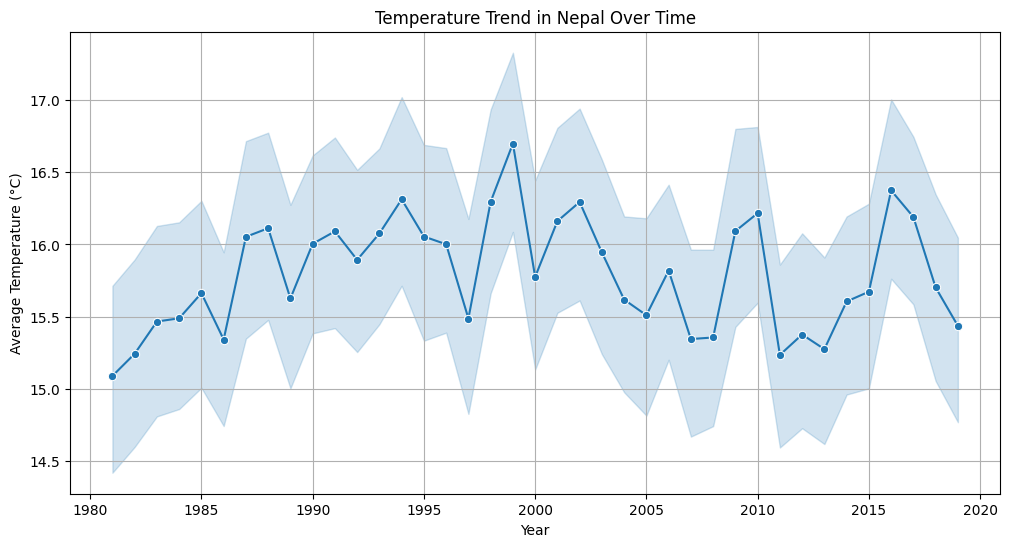

In [29]:
plt.figure(figsize=(12, 6))

# Correcting the column name to match dataset
sns.lineplot(x=df['YEAR'], y=df['T2M'], marker='o')

plt.title('Temperature Trend in Nepal Over Time')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.show()


#### Precipitation trend over time

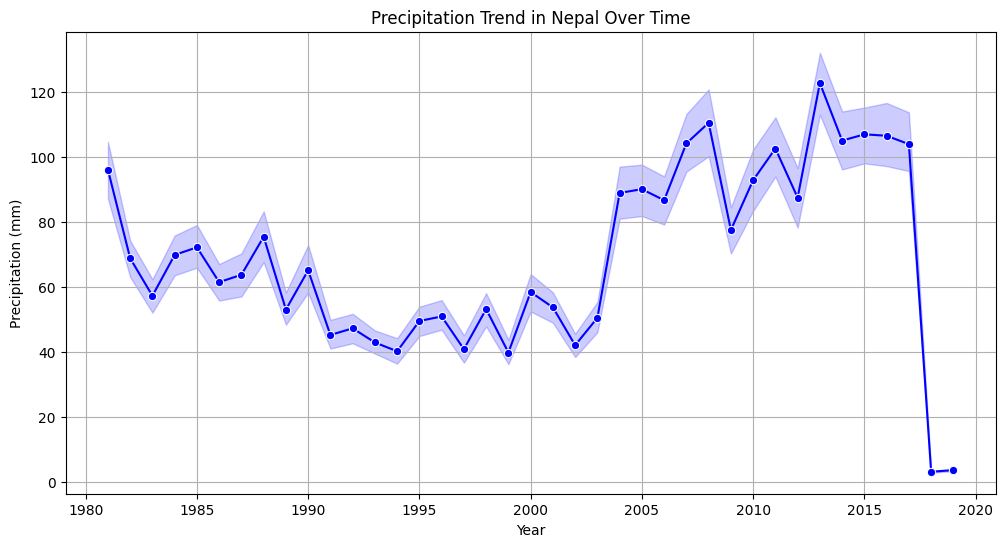

In [30]:
plt.figure(figsize=(12, 6))

# Corrected column names
sns.lineplot(x=df['YEAR'], y=df['PRECTOT'], marker='o', color='blue')

plt.title('Precipitation Trend in Nepal Over Time')
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

#### Corelation Heat map

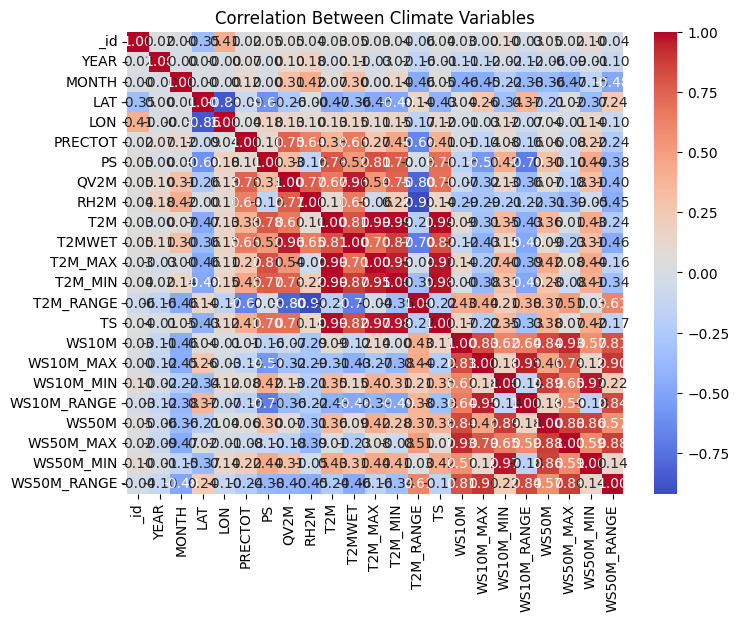

In [41]:

numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Climate Variables')
plt.show()


#### Temperature vs Precipitation Scatter plot

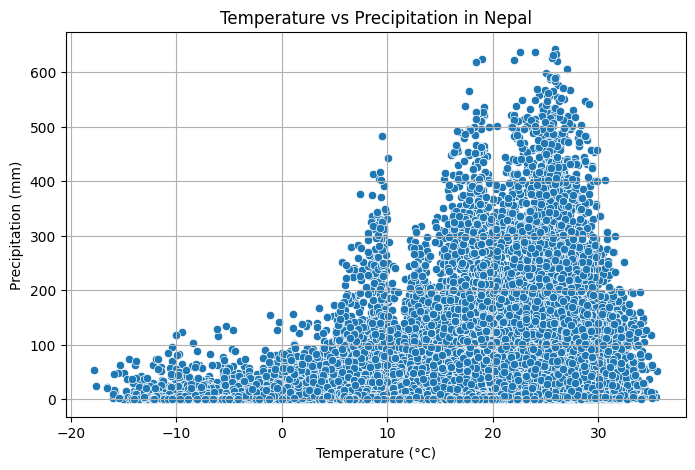

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['T2M'], y=df['PRECTOT'])
plt.title('Temperature vs Precipitation in Nepal')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()


In [31]:
# Summary statistics
print(df.describe())

# Min, Max, Mean, Median for Temperature (T2M)
print("Mean Temperature:", df['T2M'].mean())
print("Max Temperature:", df['T2M'].max())
print("Min Temperature:", df['T2M'].min())
print("Median Temperature:", df['T2M'].median())

                _id          YEAR         MONTH           LAT           LON  \
count  29016.000000  29016.000000  29016.000000  29016.000000  29016.000000   
mean   14508.500000   2000.000000      6.500000     27.970645     84.273226   
std     8376.342042     11.254823      3.452112      0.880253      2.198102   
min        1.000000   1981.000000      1.000000     26.500000     80.200000   
25%     7254.750000   1990.000000      3.750000     27.300000     82.350000   
50%    14508.500000   2000.000000      6.500000     27.950000     84.300000   
75%    21762.250000   2010.000000      9.250000     28.600000     85.900000   
max    29016.000000   2019.000000     12.000000     30.000000     88.000000   

            PRECTOT            PS          QV2M          RH2M           T2M  \
count  29016.000000  29016.000000  29016.000000  29016.000000  29016.000000   
mean      68.922705     82.903742      8.465428     55.560993     15.795138   
std       98.874269     10.713284      5.217317    

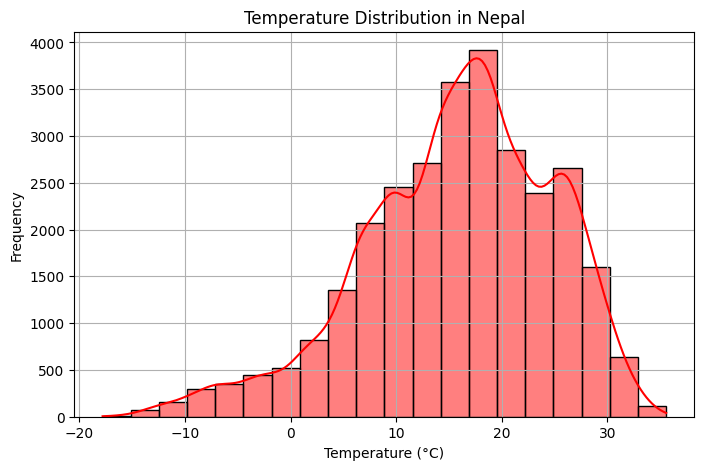

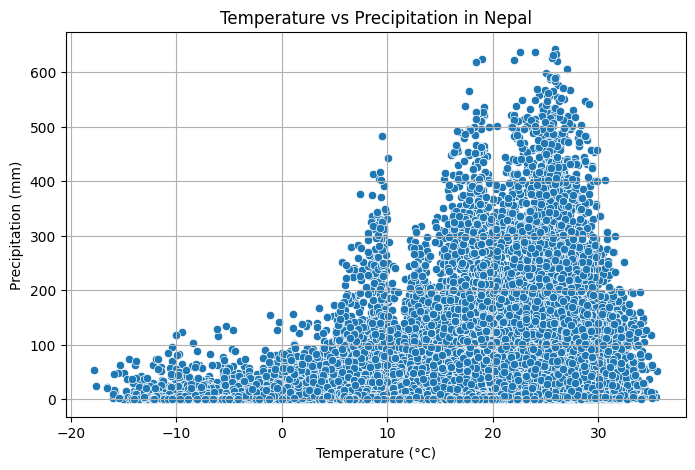

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(df['T2M'], bins=20, kde=True, color='red')

plt.title('Temperature Distribution in Nepal')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['T2M'], y=df['PRECTOT'])

plt.title('Temperature vs Precipitation in Nepal')
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

##  Findings & Insights  

###  1. Temperature Trends  
- The **average temperature** in Nepal has shown an **increasing trend** over the years.  
- This indicates potential **climate change effects** leading to a **gradual rise in temperature**.  
- The maximum temperatures are rising faster than minimum temperatures, affecting overall climate conditions.  

###  2. Precipitation Patterns  
- **Monsoon months (June - August)** show **significantly higher precipitation levels**.  
- Some years experience **irregular rainfall patterns**, possibly due to climate variations.  
- Certain districts have **consistently lower precipitation**, which could lead to **drought-like conditions**.  

###  3. Correlation Analysis  
- **Temperature (T2M) and Humidity (RH2M)** show a **negative correlation**, meaning higher temperatures tend to reduce humidity.  
- **Precipitation (PRECTOT) and Temperature (T2M)** have a weak correlation, indicating that **rainfall is not directly dependent on temperature**.  
- **Wind Speed (WS10M) and Temperature (T2M)** show some positive correlation, suggesting higher wind speeds occur in warmer conditions.  

###  4. Temperature Distribution  
- **Histogram analysis** shows that **most temperature values fall between 20-30°C**, with a few extreme values.  
- The **temperature distribution is slightly skewed**, suggesting some **outlier months** with very high/low temperatures.  

###  5. General Observations  
- Some districts exhibit **higher variability** in climate conditions compared to others.  
- **Extreme weather events** (high rainfall or high temperatures) are becoming more frequent.  
- The dataset suggests that **Nepal's climate is gradually shifting**, requiring further study on long-term effects.  
